In [1]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Load the dataset
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/CVD_Vital_SIgns.csv')

Mounted at /content/drive


🔍 Accuracy: 1.0

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1230
           1       1.00      1.00      1.00      3464

    accuracy                           1.00      4694
   macro avg       1.00      1.00      1.00      4694
weighted avg       1.00      1.00      1.00      4694


📊 Confusion Matrix:
 [[1230    0]
 [   0 3464]]


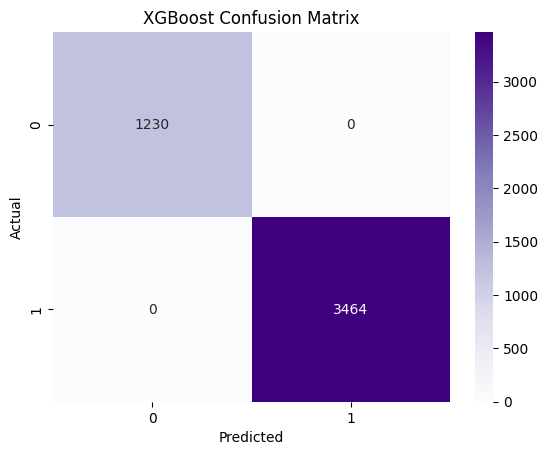

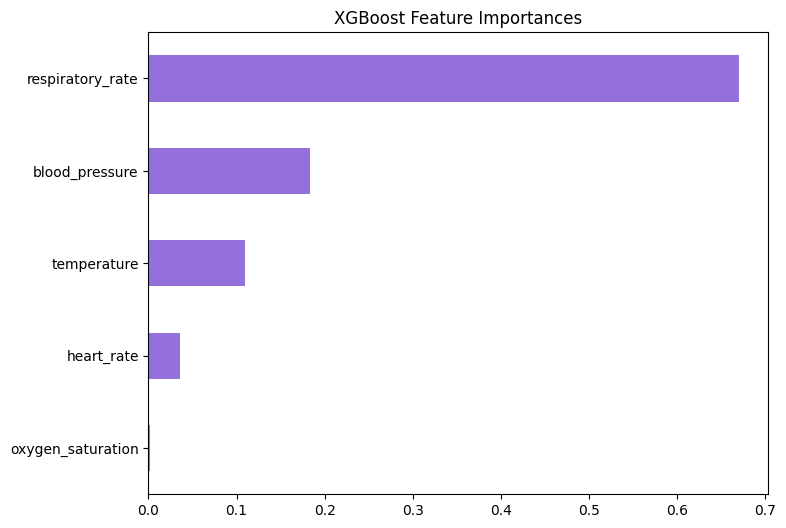

In [2]:


# STEP 2: Drop ID columns
df = df.drop(['subject_id', 'icustay_id'], axis=1)

# STEP 3: Split into features and label
X = df.drop('Label', axis=1)
y = df['Label']

# STEP 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# STEP 5: Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=22)
xgb_model.fit(X_train, y_train)

# STEP 6: Make Predictions
y_pred = xgb_model.predict(X_test)

# STEP 7: Evaluation
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# STEP 8: Confusion Matrix Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# STEP 9: Feature Importance (XGBoost)
importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6), color='mediumpurple')
plt.title("XGBoost Feature Importances")
plt.show()
